# Exploratory Data Visualization: Visualizing Earnings Based On College Majors
by Adam M. Lang

In this project, I will explore how using the pandas plotting functionality along with the Jupyter notebook interface allows us to explore data quickly using visualizations. 

We'll be working with a dataset on the job outcomes of students who graduated from college between 2010 and 2012. The original data on job outcomes was released by [American Community Survey](https://www.census.gov/programs-surveys/acs/), which conducts surveys and aggregates the data. FiveThirtyEight cleaned the dataset and released it on their [Github repo](https://github.com/fivethirtyeight/data/tree/master/college-majors).

Each row in the dataset represents a different major in college and contains information on gender diversity, employment rates, median salaries, and more. Here are some of the columns in the dataset:<br>

**Rank** - Rank by median earnings (the dataset is ordered by this column).<br>
**Major_code** - Major code.<br>
**Major** - Major description.<br>
**Major_category** - Category of major.<br>
**Total** - Total number of people with major.<br>
**Sample_size** - Sample size (unweighted) of full-time.<br>
**Men** - Male graduates.<br>
**Women** - Female graduates.<br>
**ShareWomen** - Women as share of total.<br>
**Employed** - Number employed.<br>
**Median** - Median salary of full-time, year-round workers.<br>
**Low_wage_jobs** - Number in low-wage service jobs.<br>
**Full_time** - Number employed 35 hours or more.<br>
**Part_time** - Number employed less than 35 hours.<br>

### Goals of this project:

Using visualizations, we can explore questions about the dataset including:<br>

- Do students in more popular majors make more money?<br>
    - Using scatter plots<br>
- How many majors are predominantly male? Predominantly female?<br>
    - Using histograms<br>
- Which category of majors have the most students?<br>
    - Using bar plots

In [92]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [93]:
#dataset
url = "https://raw.githubusercontent.com/fivethirtyeight/data/master/college-majors/recent-grads.csv"

In [94]:
#import dataset
recent_grads = pd.read_csv(url,index_col=0)

In [95]:
#first row formatted as a table
print(recent_grads.iloc[0])

Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 1, dtype: object


In [96]:
#view dataset
recent_grads.head()

,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
Rank,,,,,,,,,,,,,,,,,,,,
1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,1849,270,1207,37,0.018381,110000,95000,125000,1534,364,193
2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,556,170,388,85,0.117241,75000,55000,90000,350,257,50
3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,558,133,340,16,0.024096,73000,50000,105000,456,176,0
4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,1069,150,692,40,0.050125,70000,43000,80000,529,102,0
5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,23170,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [97]:
#view tail of dataset
recent_grads.tail()

,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
Rank,,,,,,,,,,,,,,,,,,,,
169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,5043,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,1848,572,1211,148,0.065112,25000,24000,34000,1488,615,82
171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,1724,648,1293,368,0.149048,25000,25000,40000,986,870,622
172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,3154,965,2738,214,0.053621,23400,19200,26000,2403,1245,308
173,3501,LIBRARY SCIENCE,1098.0,134.0,964.0,Education,0.877960,2,742,593,237,410,87,0.104946,22000,20000,22000,288,338,192


Let's examine summary statistics for the dataset.

In [98]:
recent_grads.describe(include='all')

,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173,172.000000,172.000000,172.000000,173,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
unique,NaN,173,NaN,NaN,NaN,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,MECHANICAL ENGINEERING,NaN,NaN,NaN,Engineering,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,3879.815029,NaN,39370.081395,16723.406977,22646.674419,NaN,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,1687.753140,NaN,63483.491009,28122.433474,41057.330740,NaN,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1100.000000,NaN,124.000000,119.000000,0.000000,NaN,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,2403.000000,NaN,4549.750000,2177.500000,1778.250000,NaN,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,3608.000000,NaN,15104.000000,5434.000000,8386.500000,NaN,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,5503.000000,NaN,38909.750000,14631.000000,22553.750000,NaN,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000


In [99]:
#view shape of dataframe
recent_grads.shape

(173, 20)

In [100]:
#number of rows of recent grads
raw_data_count = len(recent_grads)
print(raw_data_count)

173


In [101]:
#dropna values
recent_grads = recent_grads.dropna()

In [102]:
cleaned_data_count = len(recent_grads)
print(cleaned_data_count)

172


In [103]:
#now view shape of dataframe
recent_grads.shape

(172, 20)

As we can see there was only 1 row of NaN (missing values) and this was dropped successfully. 

# Scatter Plots in Pandas

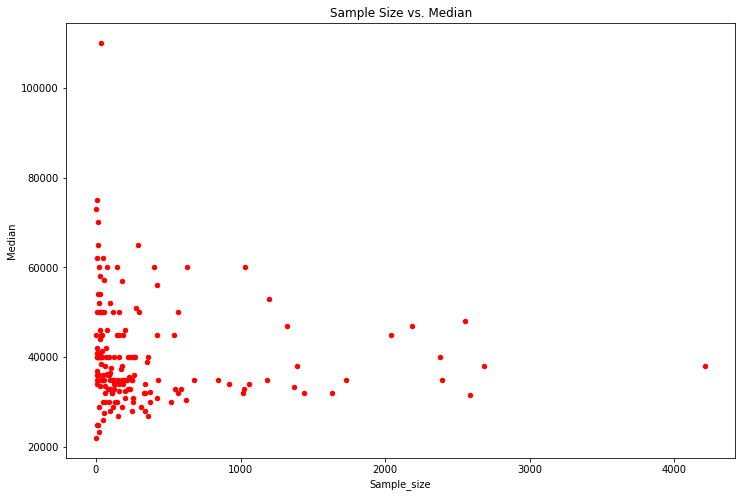

In [104]:
recent_grads.plot(x="Sample_size",y="Median",kind="scatter", color="red",figsize=(12,8));
plt.title("Sample Size vs. Median")
plt.show()

We can see that a higher median seems to be correlated with a lower sample size. 

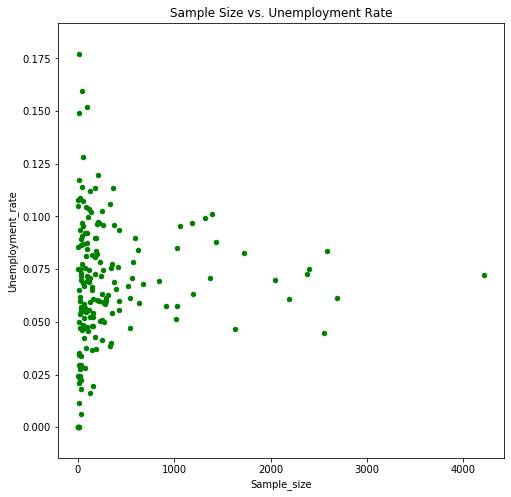

In [105]:
recent_grads.plot(x="Sample_size",y="Unemployment_rate",kind="scatter",color="green",figsize=(8,8))
plt.title("Sample Size vs. Unemployment Rate")
plt.show()

It appears that a lower sample size correlates with a moderate unemployment rate of 0.025 to 0.125. 

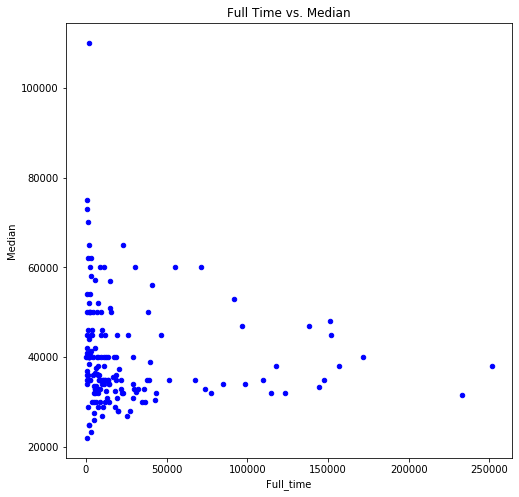

In [106]:
recent_grads.plot(x="Full_time",y="Median",kind="scatter",color="blue",figsize=(8,8));
plt.title("Full Time vs. Median")
plt.show()

This plot appears to show that the number of full time people is lower with a median between 40,000 and 60,000.

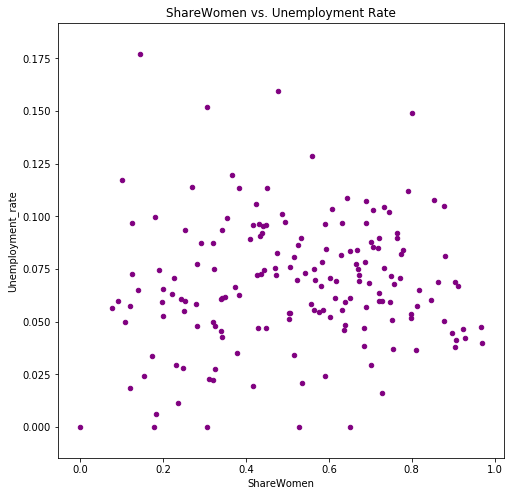

In [107]:
recent_grads.plot(x="ShareWomen",y="Unemployment_rate",kind="scatter",color="purple",figsize=(8,8));
plt.title("ShareWomen vs. Unemployment Rate")
plt.show()

If we remember the data dictionary from above the Sharewomen is the "share of women" in the sample size of the dataset. It appears more evently distributed with all levels of unemployment rate represented. 

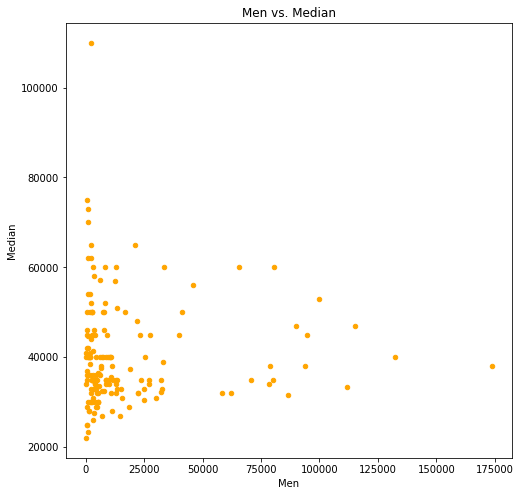

In [108]:
recent_grads.plot(x="Men",y="Median",kind="scatter",color="orange",figsize=(8,8));
plt.title("Men vs. Median")
plt.show()

It appears there are more Men with a Median salary between 40,000 and 60,000 with many outliers having a larger salary but the highest salary is only 175,000.  

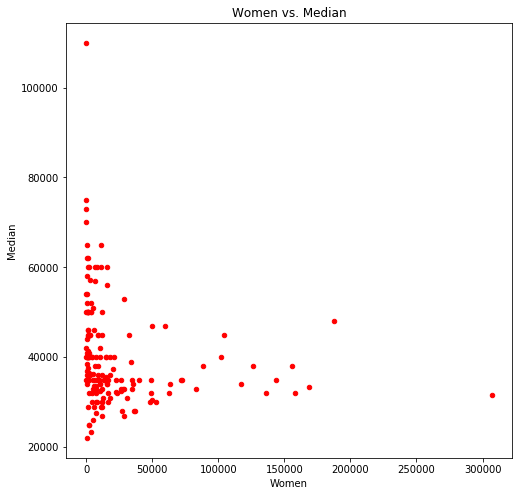

In [109]:
recent_grads.plot(x="Women",y="Median",kind="scatter",color="red",figsize=(8,8));
plt.title("Women vs. Median")
plt.show()

The resulting plot shows that Women make more money than Men with the highest being 300,000 dollars and the outliers are between 100,000 and 300,000. The median salary is still similar to Men at 40,000 to 60,000.

### Scatter Plot Analysis

Let's answer the following questions:<br>

- **Do students in more popular majors make more money?**<br>
We will have to answer this question with another plot or dataframe analysis (see below).<br>

- **Do students that majored in subjects that were majority female make more money?**<br>
It appears that both Males and Females have similar number of outliers with higher salaries. The answer to this question though is that females make more money with their outliers being between 100,000 and 300,000 whereas the highest Male salary is only 175,000.<br>
- **Is there any link between the number of full-time employees and median salary?**
We should first recall that the variable Full-Time stands for people working 35 hours or more. Based on the above scatter plot it shows that the majority is less than 50,000 employees that make between 20,000 and 60,000 dollars. 

### Do students in more popular majors make more money? 

First lets look at what the most popular majors are

In [110]:
df = pd.DataFrame(recent_grads.groupby('Major').agg('sum')['Median'].sort_values(ascending=False))
df.head(10)

,Median
Major,
PETROLEUM ENGINEERING,110000
MINING AND MINERAL ENGINEERING,75000
METALLURGICAL ENGINEERING,73000
NAVAL ARCHITECTURE AND MARINE ENGINEERING,70000
CHEMICAL ENGINEERING,65000
NUCLEAR ENGINEERING,65000
ACTUARIAL SCIENCE,62000
ASTRONOMY AND ASTROPHYSICS,62000
ELECTRICAL ENGINEERING,60000


It appears the top 5 majors that make the most money are:<br>
1. Petroleum Engineering<br>
2. Mining and Mineral Engineering<br>
3. Metallurgical Engineering<br>
4. Naval Architecture and Marine Engineering<br>
5. Chemical Engineering<br>

# Histograms in Pandas

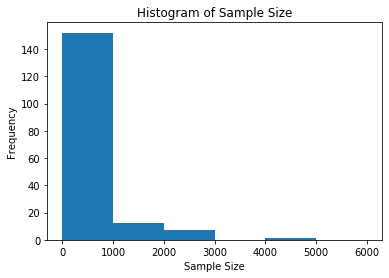

In [120]:
recent_grads['Sample_size'].plot(kind='hist',bins=6,range=(0,6000));
plt.xlabel('Sample Size');
plt.title('Histogram of Sample Size');

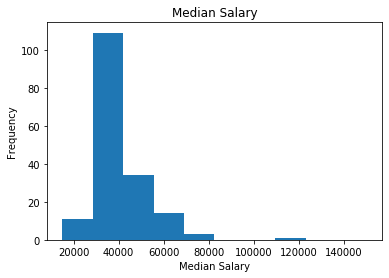

In [127]:
recent_grads['Median'].plot(kind='hist', bins=10,range=(15000,150000));
plt.title('Median Salary')
plt.xlabel('Median Salary')
plt.show()

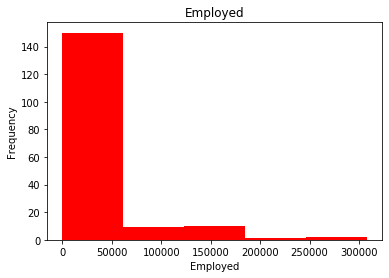

In [131]:
recent_grads['Employed'].plot(kind='hist', bins=5,color='red');
plt.title('Employed')
plt.xlabel('Employed')
plt.show()

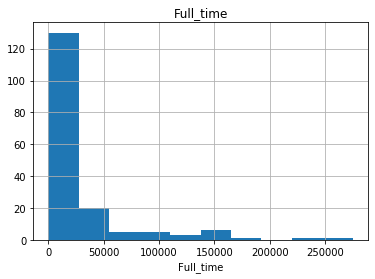

In [136]:
recent_grads['Full_time'].hist(bins=10,range=(0,275000));
plt.title('Full_time')
plt.xlabel('Full_time')
plt.show()

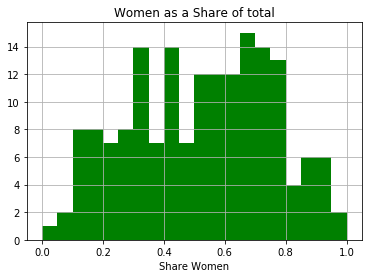

In [143]:
recent_grads['ShareWomen'].hist(bins=20,range=(0.0,1.0),color='green');
plt.title('Women as a Share of total')
plt.xlabel('Share Women')
plt.show()

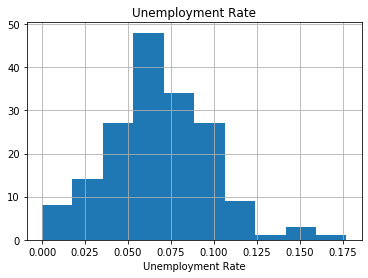

In [148]:
recent_grads['Unemployment_rate'].hist(bins=10);
plt.title('Unemployment Rate')
plt.xlabel('Unemployment Rate')
plt.show()

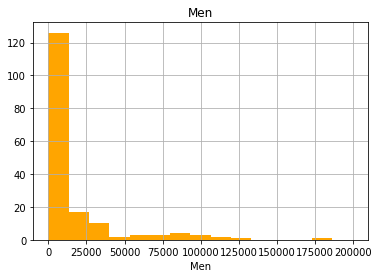

In [154]:
recent_grads['Men'].hist(bins=15,range=(0,200000),color="orange");
plt.title('Men')
plt.xlabel('Men')
plt.show()

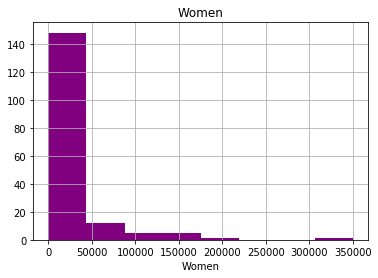

In [166]:
recent_grads['Women'].hist(bins=8,range=(0,350000),color="purple");
plt.title('Women')
plt.xlabel('Women')
plt.show()

### subplots of histograms

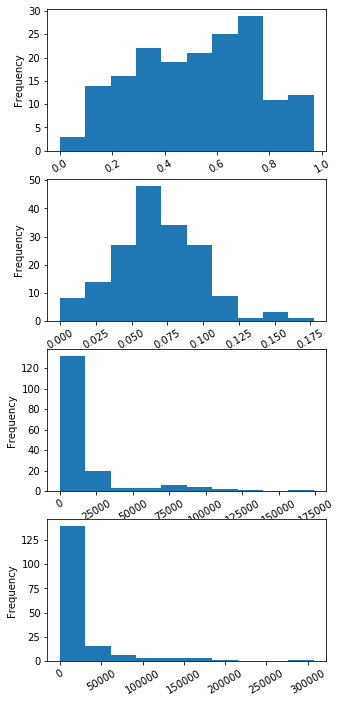

In [167]:
cols = ["Sample_size", "Median", "Employed", "Full_time", "ShareWomen", "Unemployment_rate", "Men", "Women"]

fig = plt.figure(figsize=(5,12))
for r in range(4,8):
    ax = fig.add_subplot(4,1,r-3)
    ax = recent_grads[cols[r]].plot(kind='hist', rot=30)

# Scatter Matrix Plots in Pandas

In [168]:
#import scatter matrix
from pandas.plotting import scatter_matrix

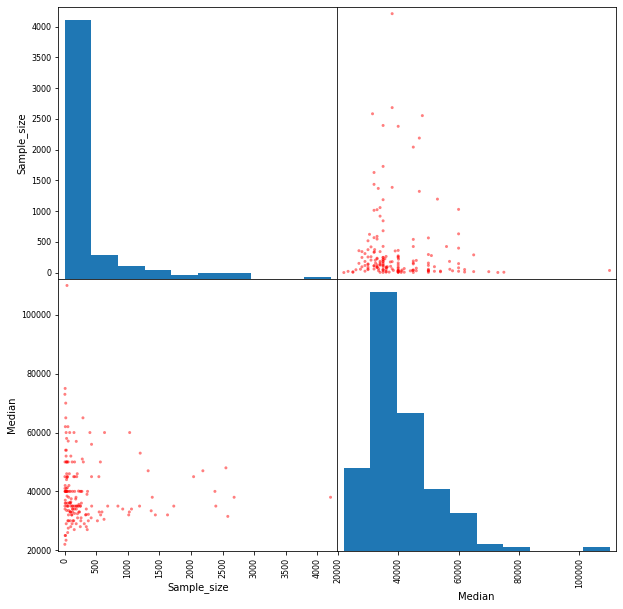

In [174]:
#Create a 2 by 2 scatter matrix plot using the Sample_size and Median columns

scatter_matrix(recent_grads[['Sample_size','Median']],figsize=(10,10),color="red");

The above scatter matrix shows us that the Median income is most common around 40,000 which corresponds to a sample size of about 4,000 people. 

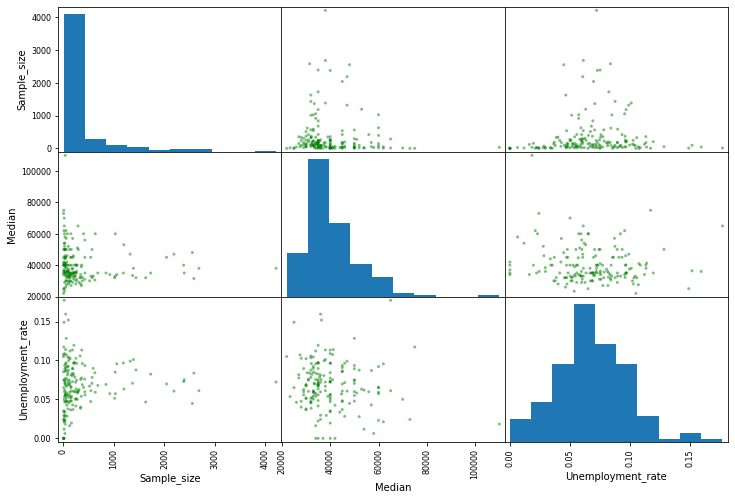

In [173]:
#Create a 3 by 3 scatter matrix plot using the Sample_size, Median, and Unemployment_rate columns
scatter_matrix(recent_grads[['Sample_size','Median','Unemployment_rate']],figsize=(12,8),color='green');

We can see from the scatter matrices the distribution of the dataset.<br>
- The Median income is around 40,000 which corresponds to an Unemployment rate between 0.05 and 0.10 which can be seen in the histogram.<br>
- The Sample Size of about 4000 corresponds to the average unemployment rate of 0.05 to 0.10 where most of the variables are found.<br>

# Bar Plots in Pandas

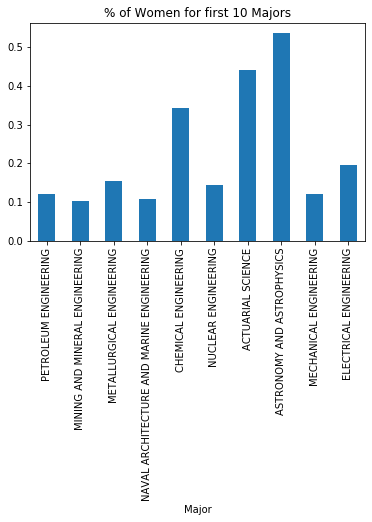

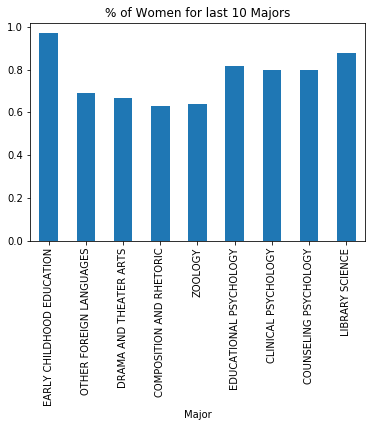

In [184]:
#Use bar plots to compare the percentages of women (ShareWomen) from the first ten rows and 
##last ten rows of the recent_grads dataframe.
recent_grads[:10].plot.bar(x="Major",y="ShareWomen",legend=False);
plt.title("% of Women for first 10 Majors");

recent_grads[163:].plot.bar(x="Major",y="ShareWomen",legend=False);
plt.title("% of Women for last 10 Majors");

- The above plots show that Astronomy and AstroPhysics as well as Actuarial Science are popular for the first 10 majors.<br>
- The bottom 10 major shows us that Early Childhood Education leads the way with most Women followed by Library Science. 

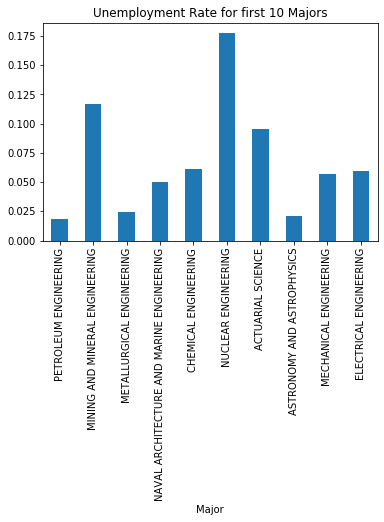

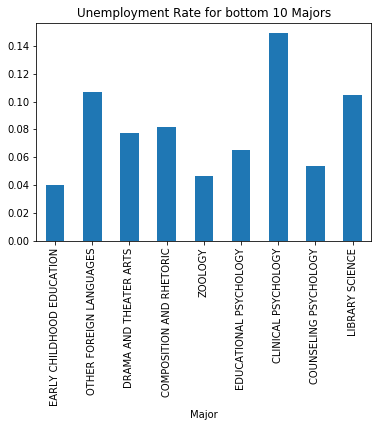

In [183]:
#Use bar plots to compare the unemployment rate (Unemployment_rate) from the first ten rows and 
##last ten rows of the recent_grads dataframe.

recent_grads[:10].plot.bar(x="Major",y="Unemployment_rate",legend=False);
plt.title("Unemployment Rate for first 10 Majors");

recent_grads[163:].plot.bar(x="Major",y="Unemployment_rate",legend=False);
plt.title("Unemployment Rate for bottom 10 Majors");

- It appears the highest unemployment rate for the first 10 majors is in Nucler Engineering and Mining/Mineral Engineering.<br>
- The highest unemployment rate for the bottom 10 is in Counseling Psychology, Library Science, and Other Foreign Languages. 